In [1]:
import pandas as pd
from scipy.stats import normaltest

In [2]:
import sqlite3

sql = """
SELECT finishing, heading_accuracy, volleys, free_kick_accuracy, shot_power, long_shots, penalties
FROM PLAYER_ATTRIBUTES
"""

con = sqlite3.connect("database.sqlite")

In [3]:
attributes = pd.read_sql_query(sql, con)

attributes.dropna(inplace = True)

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%:

In [4]:
# Amb aquest test provarem si les dades de finishing estan distribuides d'una manera normal

stat, p = normaltest(attributes["finishing"])

print(f"El valor p és: {p}")
print("""Al ser menor que el nivell alpha (0.05), refusem la hipòtesi nul·la, que en el cas del test 
      D’Agostino K^2 implica que la distribució de les dades no és normal""")

El valor p és: 0.0
Al ser menor que el nivell alpha (0.05), refusem la hipòtesi nul·la, que en el cas del test 
      D’Agostino K^2 implica que la distribució de les dades no és normal


(array([ 2054.,  9470., 23726., 21473., 22219., 29002., 41273., 24212.,
         7139.,   697.]),
 array([ 1. , 10.6, 20.2, 29.8, 39.4, 49. , 58.6, 68.2, 77.8, 87.4, 97. ]),
 <BarContainer object of 10 artists>)

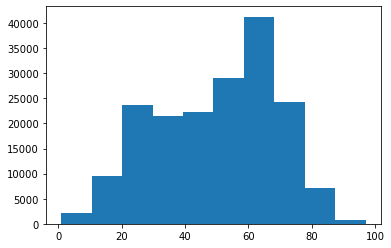

In [5]:
# Demostració visual que no es tracta d'una distribució normal:

from matplotlib import pyplot as plt

plt.hist(attributes["finishing"])

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%:

In [6]:
from scipy.stats import spearmanr

stat, p = spearmanr(attributes["finishing"], attributes["volleys"])

print(f"El valor p és: {p}")

print("""
Al ser menor que el nivell alpha (0.05), refusem la hipòtesi nul·la. En el cas del test de Spearman implica 
que una correlació entre els dos elements és molt possible
""")

print(f"En concret la correlació és de {stat}, és a dir, una correlació molt forta i positiva.")

El valor p és: 0.0

Al ser menor que el nivell alpha (0.05), refusem la hipòtesi nul·la. En el cas del test de Spearman implica 
que una correlació entre els dos elements és molt possible

En concret la correlació és de 0.8368909900705522, és a dir, una correlació molt forta i positiva.


Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%:

In [7]:
# For the 3 variables analysis I would have liked to analyse whether the means of different attributes are 
# significantly better through an ANOVA analysis. However, the variables in this dataset are not normally 
# distributed. Hence, a Kruskal-Wallis H test will prove more useful, since it will compare the distribution of 
# more than one sample

from scipy.stats import kruskal

stat, p = kruskal(attributes["finishing"], attributes["volleys"], attributes["free_kick_accuracy"])

print(f"El valor p és: {p}")

print("""
Al ser menor que el nivell alpha (0.05, i fins i tot més petit que 0.01), refusem la hipòtesi nul·la. En el cas 
del test H de Kruskal-Wallis implica que les tres mostres tenen distribucions diferents amb un alt grau de certesa
""")

El valor p és: 5.864570183546127e-48

Al ser menor que el nivell alpha (0.05, i fins i tot més petit que 0.01), refusem la hipòtesi nul·la. En el cas 
del test H de Kruskal-Wallis implica que les tres mostres tenen distribucions diferents amb un alt grau de certesa

